In [1]:
import numpy as np

import scipy as sp
import scipy.integrate as integrate
import scipy.constants as spcst
from scipy.stats import expon

import matplotlib.pyplot as plt

In [2]:
from ipywidgets import Layout

In [26]:
plt.style.use('dark_background')

# Example Mass Action CRN
2X + 3Y <-> Z     
Z + 5X   -> Y 
### look at PNAS Solove.. et al   

In [112]:
x0    = np.array( [ 0.5, 0.25, 0.25 ] )
rates = np.array( [ 0.11, 0.00008, 0.4 ] )
gamma = np.array( [ [ -2, 2, -5 ], [ -3, 3, 1 ], [ 1, -1, -1 ] ] )

f = lambda x, t0: gamma.dot( np.array( [ x[ 0 ]**2*x[ 1 ]**3, x[ 2 ], x[ 2 ]*x[ 0 ]**5 ] )*rates )

In [113]:
gamma

array([[-2,  2, -5],
       [-3,  3,  1],
       [ 1, -1, -1]])

In [114]:
time = np.linspace(0, 20000, 10000)

In [115]:
history = integrate.odeint( f, x0, time )

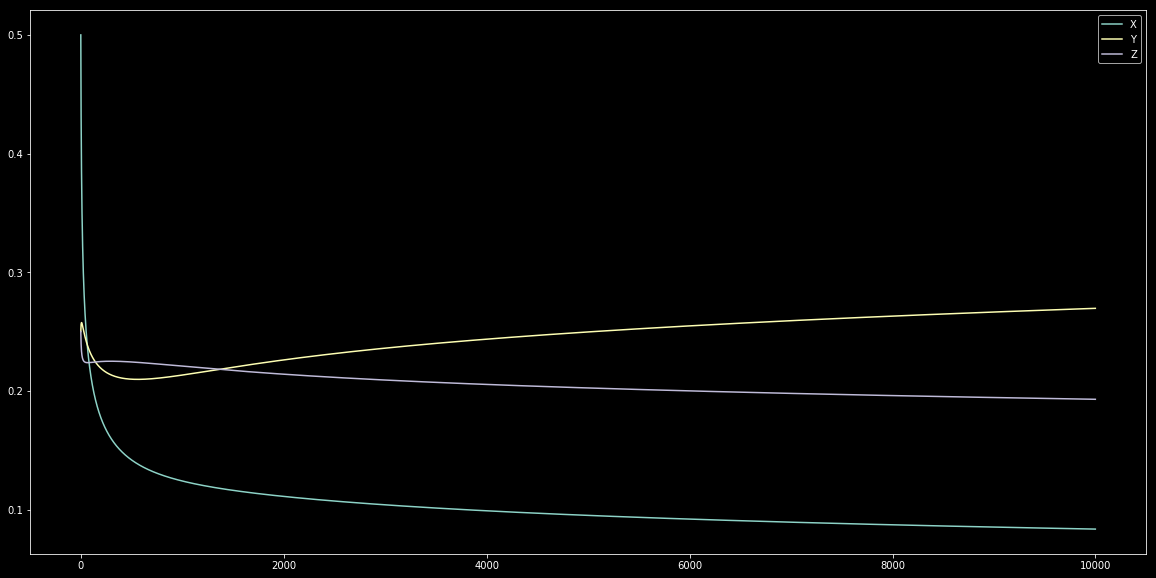

In [116]:
plt.figure( figsize = ( 20, 10 ) )
plt.plot( history[ :, 0 ], label = "X" )
plt.plot( history[ :, 1 ], label = "Y" )
plt.plot( history[ :, 2 ], label = "Z" )
plt.legend()
plt.show()

# Example Stochastic CRN
X + Y <-> 3Z + Y   
2Y -> X + Z   
Y ->

In [88]:
x0            = np.array( [ 2, 30, 24 ] )*spcst.Avogadro*1e-9
reaction_type = [ 0, 0, 2, 1 ]#0: bi, 1: uni, 3: bi bi
reactions_lhs = np.array( [ [ 1, 1, 0 ], [ 0, 1, 3 ], [ 0, 2, 0 ], [ 0, 1, 0 ] ] )
reactions_rhs = np.array( [ [ 0, 1, 3 ], [ 1, 1, 0 ], [ 1, 0, 1 ], [ 0, 0, 0 ] ] )
rates         = np.array( [ 0.11, 0.00008, 0.004, 0.04 ] )

max_iter = 1e6
k = 0
holding_times = []
history = [ x0 ]

In [89]:
def get_propensity_vec( x0 ):
    propensity_vec = []
    for i, type_ in enumerate( reaction_type ):
        
        reactants = reactions_lhs[ i ].nonzero()[ 0 ]
        
        if type_ == 0:
            propensity = rates[ i ]*x0[ reactants ].prod()/x0.sum()
        elif type_ == 1:
            propensity = rates[ i ]*x0[ reactants ][ 0 ]
        else:
            propensity = (rates[ i ]/2.)*( x0[ reactants ][ 0 ]*( x0[ reactants ][ 0 ] - 1 ) )/x0.sum()
        
        propensity_vec.append( propensity )
    return np.array( propensity_vec )

In [91]:
while k < max_iter:
    
    propensity_vec = get_propensity_vec( x0 )
    
    holding_time = expon( propensity_vec.sum() ).rvs()
    
    reac = np.random.choice( range( len( reaction_type ) ), p = propensity_vec/propensity_vec.sum())
    
    x0 -= reactions_lhs[ reac ]
    x0 += reactions_rhs[ reac ]
    
    holding_times.append( holding_time )
    history.append( x0 )
    
    k += 1

KeyboardInterrupt: 

In [95]:
history = np.array( history )

In [100]:
history / history.sum( axis = 1 )[ : , np.newaxis ]

array([[0.03571429, 0.53571429, 0.42857143],
       [0.03571429, 0.53571429, 0.42857143],
       [0.03571429, 0.53571429, 0.42857143],
       ...,
       [0.03571429, 0.53571429, 0.42857143],
       [0.03571429, 0.53571429, 0.42857143],
       [0.03571429, 0.53571429, 0.42857143]])